In [1]:
import xarray as xr
# Optional: plot the data (requires matplotlib)
import matplotlib.pyplot as plt

# Path to your GEBCO NetCDF file
gebco_file = '/Users/mnky9800n/repos/agartha/agartha/data/dap.ceda.ac.uk/bodc/gebco/global/gebco_2025/ice_surface_elevation/netcdf/GEBCO_2025.nc'

# Open the dataset
ds = xr.open_dataset(gebco_file)

In [2]:

# Print the dataset structure to inspect available variables
print(ds)

<xarray.Dataset> Size: 7GB
Dimensions:    (lat: 43200, lon: 86400)
Coordinates:
  * lon        (lon) float64 691kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * lat        (lat) float64 346kB -90.0 -89.99 -89.99 ... 89.99 89.99 90.0
Data variables:
    crs        |S1 1B ...
    elevation  (lat, lon) int16 7GB ...
Attributes: (12/36)
    title:                           The GEBCO_2025 Grid - a continuous terra...
    summary:                         The GEBCO_2025 Grid is a continuous, glo...
    keywords:                        BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ...
    Conventions:                     CF-1.6, ACDD-1.3
    id:                              DOI: 10.5285/37c52e96-24ea-67ce-e063-708...
    naming_authority:                https://dx.doi.org
    ...                              ...
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  1.0
    geospatial_vertical_positive:    up
    identifier_product_doi:          DOI: 10.5285/37c52e96-24ea-

In [3]:
# Define bounding box for Hawaii (approximate values)
min_lon, max_lon = -161, -154
min_lat, max_lat = 18, 23

# Select the region around Hawaii
ds = ds.sel(lon=slice(min_lon, max_lon), lat=slice(min_lat, max_lat))

In [4]:
# Common variable names in GEBCO datasets:
# - 'elevation', 'lon', 'lat' or sometimes 'z', 'longitude', 'latitude'
elevation = ds['elevation']  # or ds['z']
lon = ds['lon']              # or ds['longitude']
lat = ds['lat']              # or ds['latitude']

# For quick access, convert to numpy arrays
elev_array = elevation.values
lon_array = lon.values
lat_array = lat.values


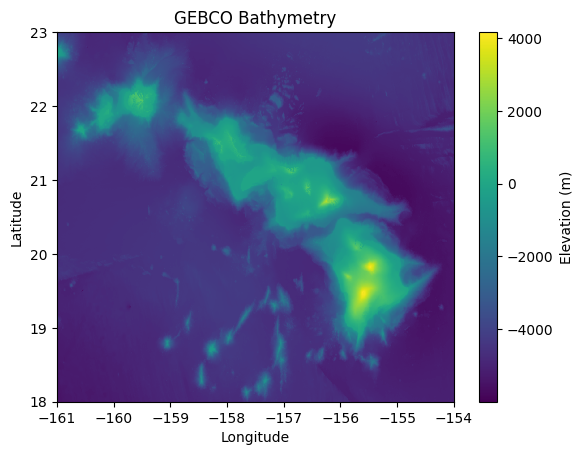

In [5]:
plt.pcolormesh(lon_array, lat_array, elev_array)
plt.colorbar(label='Elevation (m)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GEBCO Bathymetry')
plt.show()